# SORA - Stellar Occultation Reduction and Analysis

## Occultation Object Class

The Occultation Object Class within SORA was created to reduce and analyze stellar occultations, and control all the other Object Classes at SORA package. Here we have some useful tasks that allow converting the times for each observatory in positions in the sky plane ($\xi$, $\eta$), fit an ellipse to the points, obtain the astrometrical position resulting, among others.

The documentation at <font color=blue>add link</font> contains the details about every step.  

This Jupyter-Notebook was designed as a tutorial for how to work with the Occultation Object Class. More information about the other classes, please refer to their specif Jupyter-Notebook. Any further question, please contact the core team: Altair Ramos Gomes Júnior, Bruno Eduardo Morgado, Gustavo Benedetti Rossi, and Rodrigo Carlos Boufleur.

### Index

1. [Instantiating the Occultation Object and adding observations](#section_1)

2. [Converting from times to $\xi$ and $\eta$ in the sky plane](#section_2)

3. [Chords display and ellipse fit](#section_3)

4. [Viewing and saving the results](#section_4)

In [1]:
## SORA package
from sora import Occultation, EphemKernel, Star, LightCurve, Observer

## Other main packages
from astropy.time import Time
import astropy.units as u

## Usual packages
import numpy as np
import matplotlib.pylab as pl
import os

<a id="section_1"></a>
### 1. Instantiating the Occultation Object and adding observations

The Occultation Object Class can be instantiated in only one way. For this it is needed a Star Object, an Ephemeris Object (EphemKernel, EphemPlanet or EphemJPL), and the occultation time (within 10 minutes for the correct value).

**The Object Docstring was designed to help the users. Also, each function has its Docstring containing its main purpose and the needed parameters (physical description and formats). Please, do not hesitate to use it.**

In [2]:
Occultation?

**First let's instanciate the Star and the Ephemeris**

SORA will automatically search for the star information. A warning will raise when any information is missing. In this example, there is no star radius available in Gaia.

In [3]:
ephem_occ = EphemKernel('Chariklo', 2010199, kernels=['input/bsp/Chariklo.bsp','input/bsp/de438_small.bsp'])
star_occ  = Star(coord='18 55 15.65250 -31 31 21.67051') # Occ Chariklo 22-06-2017
time_occ  = Time('2017-06-22 21:18')

1 Gaia-DR2 star found G=14.2375
star coordinate at J2015.5: RA=18h55m15.65196s +/- 0.03 mas, DEC=-31d31m21.6665s +/- 0.0299 mas


/home/morgado/miniconda3/lib/python3.7/site-packages/sora/star.py:322: UserWarning: Gaia catalogue does not have star radius.
  warnings.warn('Gaia catalogue does not have star radius.')


**Now, we can instantiate the Occultation**

In [4]:
occ = Occultation(star_occ, ephem_occ, time_occ)

print(occ)

Stellar occultation of star Gaia-DR2 6760223758801661440 by Chariklo.

Geocentric Closest Approach: 0.049 arcsec
Instant of CA: 2017-06-22 21:18:48.250
Position Angle: 359.72 deg
Geocentric shadow velocity: -22.00 km / s


No observations reported

###############################################################################
                                     STAR                                      
###############################################################################
ICRS star coordinate at J2015.5:
RA=18h55m15.65196s +/- 0.0300 mas, DEC=-31d31m21.6665s +/- 0.0299 mas

Gaia-DR2 star Source ID: 6760223758801661440
Magnitudes: G: 14.238, B: 14.320, V: 13.530, R: 14.180, J: 12.395, H: 11.781,
            K: 11.627

Apparent diameter from Kervella et. al (2004):
    V: 0.0216 mas, B: 0.0216 mas
Apparent diameter from van Belle (1999):
    sg: B: 0.0238 mas, V: 0.0244 mas
    ms: B: 0.0261 mas, V: 0.0198 mas
    vs: B: 0.0350 mas, V: 0.0315 mas

GCRS star coordinate at occu

**Note that at the print(Occultation) there are no observations added to this Occultation yet.**

It is needed one Observer and one LightCurve to define an observation.

**Let's instanciate the Observers**

Here we will give 5 locations

In [5]:
out = Observer(name='Outeniqua'  ,lon='+16 49 17.710', lat='-21 17 58.170', height =1416)
ond = Observer(name='Onduruquea' ,lon='+15 59 33.750', lat='-21 36 26.040', height =1220)
tiv = Observer(name='Tivoli'     ,lon='+18 01 01.240', lat='-23 27 40.190', height =1344)
whc = Observer(name='Windhoek'   ,lon='+17 06 31.900', lat='-22 41 55.160', height =1902)
hak = Observer(name='Hakos'      ,lon='+16 21 41.320', lat='-23 14 11.040', height =1843)

**Let's instanciate the LightCurves**

Here we give 6 light curves. Note that 2 are for the same site observed with different telescopes.

In [6]:
out_lc = LightCurve(name='Outeniqua lc',
                    initial_time=Time('2017-06-22 21:20:00.056'),
                    end_time =Time('2017-06-22 21:29:59.963'),
                    immersion=Time('2017-06-22 21:21:20.329'),immersion_err=0.032,
                    emersion =Time('2017-06-22 21:21:30.343'),emersion_err=0.034)

ond_lc = LightCurve(name='Onduruquea lc',
                    initial_time=Time('2017-06-22 21:11:52.175'),
                    end_time =Time('2017-06-22 21:25:13.389'),
                    immersion=Time('2017-06-22 21:21:22.213'),immersion_err=0.010,
                    emersion =Time('2017-06-22 21:21:33.824'),emersion_err=0.011)

tiv_lc = LightCurve(name='Tivoli lc',
                    initial_time=Time('2017-06-22 21:16:00.094'),
                    end_time =Time('2017-06-22 21:28:00.018'),
                    immersion=Time('2017-06-22 21:21:15.628'),immersion_err=0.011,
                    emersion =Time('2017-06-22 21:21:19.988'),emersion_err=0.038)

whc_c14_lc = LightCurve(name='Windhoek C14 lc',
                    initial_time=Time('2017-06-22 21:12:48.250'),
                    end_time =Time('2017-06-22 21:32:47.963'),
                    immersion=Time('2017-06-22 21:21:17.609'),immersion_err=0.024,
                    emersion =Time('2017-06-22 21:21:27.564'),emersion_err=0.026)

whc_d16_lc = LightCurve(name='Windhoek D16 lc',
                    initial_time=Time('2017-06-22 21:20:01.884'),
                    end_time =Time('2017-06-22 21:22:21.894'),
                    immersion=Time('2017-06-22 21:21:17.288'),immersion_err=0.028,
                    emersion =Time('2017-06-22 21:21:27.228'),emersion_err=0.034)

hak_lc = LightCurve(name='Hakos lc',
                    initial_time=Time('2017-06-22 21:10:19.461'),
                    end_time =Time('2017-06-22 21:30:19.345'))

**To add the observation to the Occultation just use the _Occultation.add_observer()_**

During this step the LightCurve is automatic updated using the Occultation parameters: the Shadow's velocity, the star diameter and the distance to the occulting body. This means that is no need for the user to do the _LightCurve.set_dist()_, _LightCurve.set_vel()_ and _LightCurve.set_star_diam()_.

In [7]:
occ.add_observation(out,out_lc)
occ.add_observation(ond,ond_lc)
occ.add_observation(tiv,tiv_lc)

Note that a warning comes up if the flux drop is not calculated automatically.

**The same goes for two observation at with the same Observer**

In [8]:
occ.add_observation(whc,whc_c14_lc)
occ.add_observation(whc,whc_d16_lc)

**Also, the same goes for negative observations**

In [9]:
occ.add_observation(hak,hak_lc)

**To check which observers were added to the Occultation just use** _Occultation.observations()_

In [10]:
occ.observations()

Observer= Outeniqua, LC: Outeniqua lc
Observer= Onduruquea, LC: Onduruquea lc
Observer= Tivoli, LC: Tivoli lc
Observer= Windhoek, LC: Windhoek C14 lc
Observer= Windhoek, LC: Windhoek D16 lc
Observer= Hakos, LC: Hakos lc


**If any of them was wrongly added just remove it using** _Occultation.remove_observation()_

In [11]:
occ.remove_observation('Outeniqua')
occ.remove_observation('Hakos lc')

In [12]:
occ.observations()

Observer= Onduruquea, LC: Onduruquea lc
Observer= Tivoli, LC: Tivoli lc
Observer= Windhoek, LC: Windhoek C14 lc
Observer= Windhoek, LC: Windhoek D16 lc


In [13]:
occ.add_observation(out,out_lc)
occ.add_observation(hak,hak_lc)

<a id="section_2"></a>
### 2. Converting from times to $\xi$ and $\eta$ in the sky plane

This step is done automatically without the user has to ask for it. The user can see its results using the python dictionary Occultation.positions that contains all positions for all observations added.

In [14]:
occ.positions

{'Onduruquea': {'lon': <Longitude 15.99270833 deg>,
  'lat': <Latitude -21.60723333 deg>,
  'height': <Quantity 1220. m>,
  'Onduruquea lc': {'status': 'positive',
   'immersion': {'on': True,
    'time': <Time object: scale='utc' format='iso' value=2017-06-22 21:21:22.213>,
    'value': (-139.356, 8.272),
    'vel': (22.352, 0.246),
    'time_err': 0.01,
    'error': ((-139.58, 8.27), (-139.133, 8.275))},
   'emersion': {'on': True,
    'time': <Time object: scale='utc' format='iso' value=2017-06-22 21:21:33.824>,
    'value': (120.173, 11.131),
    'vel': (22.352, 0.246),
    'time_err': 0.011,
    'error': ((119.927, 11.129), (120.419, 11.134))}}},
 'Tivoli': {'lon': <Longitude 18.01701111 deg>,
  'lat': <Latitude -23.46116389 deg>,
  'height': <Quantity 1344. m>,
  'Tivoli lc': {'status': 'positive',
   'immersion': {'on': True,
    'time': <Time object: scale='utc' format='iso' value=2017-06-22 21:21:15.628>,
    'value': (-71.664, -125.693),
    'vel': (22.356, 0.238),
    'time_

**Any specif value can be obtained using the keys [Observer][LightCurve]**

In [15]:
occ.positions['Outeniqua']['Outeniqua lc']['immersion']['value']

(-119.381, 66.47)

**The user can save these position**

In [16]:
occ.to_file()

**Even thought it is not needed, the user can use it freely, just import the positionv function within the sora.occ_fit.**

In [18]:
from sora.occultation import positionv

positionv?

In [19]:
f, g, vel_f, vel_g = positionv(star_occ,ephem_occ,out,Time('2017-06-22 21:21:22.213'))

print('f:  {:+07.3f} km'.format(f))
print('g:  {:+07.3f} km'.format(g))
print('vf: {:+07.3f} km/s'.format(vel_f))
print('vg: {:+07.3f} km/s'.format(vel_g))

f:  -77.262 km
g:  +66.930 km
vf: +22.356 km/s
vg: +00.244 km/s


<a id="section_3"></a>
### 3. Chords display and ellipse fit

The next step is the visualization of the chords in the sky plane and the fitting of an ellipse. The five parameters that describe the ellipse are:

**1.** and **2.** The centre position ($f_0$, $g_0$)

**3.** The apparent equatorial radius, semi-major axix ($a'$)

**4.** The oblatness ($\epsilon' = \frac{a' - b'}{a'}$) 

**5.** The position angle of the pole, semi-minor axix ($P$)

The result of the fit is a ChiSquare Object, and its functions can be found at its specific Jupyter-Notebook.

**Let's look at the chords** 

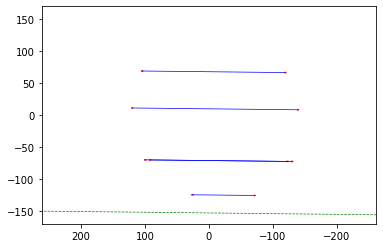

In [20]:
occ.plot_chords()

##################################################
pl.xlim(+170,-170)
pl.ylim(-170,+170)
pl.show()

**If there are know time shifts, this can be easily solved using** _LightCurve.dt_

In [21]:
out_lc.dt = -0.150
ond_lc.dt = -0.190
tiv_lc.dt = -0.150
whc_c14_lc.dt = -0.375
whc_d16_lc.dt = +0.000

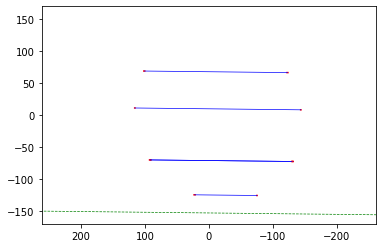

In [22]:
occ.plot_chords()

##################################################
pl.xlim(+170,-170)
pl.ylim(-170,+170)
pl.show()

**Now, let's fit the ellipse**

Here, there is only the manual method, the user should provide the parameters to the fit and also the region for searching each parameters.  

In [23]:
occ.fit_ellipse?

In [24]:
ellipse_chi2  = occ.fit_ellipse(center_f=-15.046, center_g=-2.495, dcenter_f=3, dcenter_g=10, 
                                equatorial_radius=138, dequatorial_radius=3, oblateness=0.093, 
                                doblateness=0.02, pos_angle=126, dpos_angle=10 ,loop=100000,
                                dchi_min=10,number_chi=10000)

Note that here we only used 100000 loops, but it is recommended at least 10 million for a good sample for each parameter.

In [25]:
print(ellipse_chi2)

Minimum chi-square: 11.759
Number of fitted points: 10
Number of fitted parameters: 5
Minimum chi-square per degree of freedom: 2.352

center_f:
    1-sigma: -14.709 +/- 0.163
    3-sigma: -14.707 +/- 0.438

center_g:
    1-sigma: -1.175 +/- 0.571
    3-sigma: -1.150 +/- 1.794

equatorial_radius:
    1-sigma: 138.530 +/- 0.480
    3-sigma: 138.662 +/- 1.618

oblateness:
    1-sigma: 0.086 +/- 0.004
    3-sigma: 0.087 +/- 0.011

position_angle:
    1-sigma: 124.445 +/- 2.161
    3-sigma: 124.652 +/- 5.560



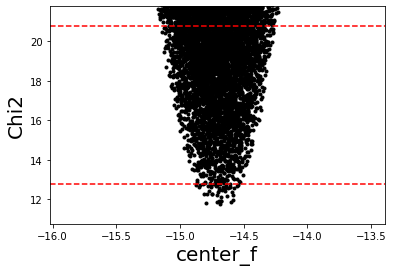

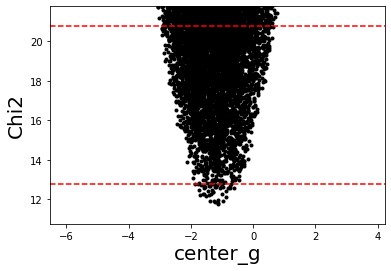

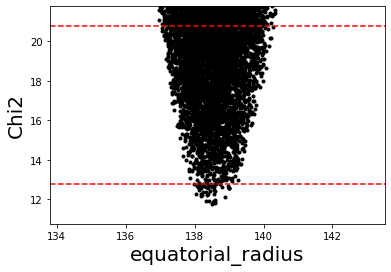

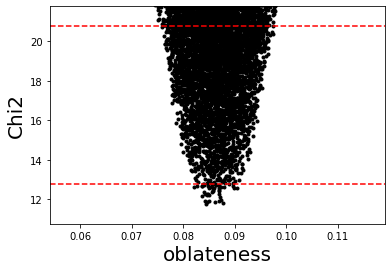

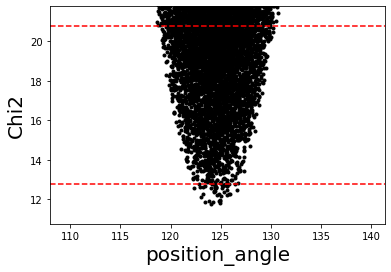

In [26]:
ellipse_chi2.plot_chi2()

**Now, besides the chords we can plot the fitted ellipse**

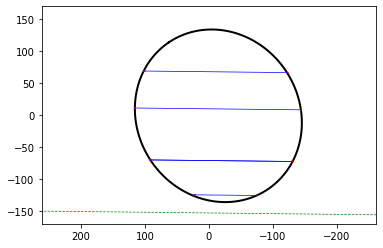

In [27]:
from sora.extra import draw_ellipse

draw_ellipse(**ellipse_chi2.get_values())
occ.plot_chords()

##################################################
pl.xlim(+170,-170)
pl.ylim(-170,+170)
pl.show()

**Not just the fitted ellipse, but the user can also plot all the ellipses inside an sigma region, for instance within $3\sigma$**

This step will, possible, plot large number of ellipses, this can spend some CPU time.

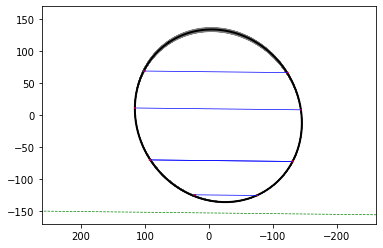

In [28]:
draw_ellipse(**ellipse_chi2.get_values())
draw_ellipse(**ellipse_chi2.get_values(sigma=3))

occ.plot_chords()

##################################################
pl.xlim(+170,-170)
pl.ylim(-170,+170)
pl.show()

**The radial velocity issue**

During the LightCurve fitting, the user has to add the velocity for that light curve. In the initial process, only the geocentric velocity was determined, and only after the fit, a radial velocity can be correctly calculated.

Usually, the light curves' features are dominated by the exposure time. However, in the cases that the fresnel diffraction plays a significant role in it, we suggest that the LightCurve fitting procedure should be redone with the correct velocities.

In [29]:
occ.check_velocities()

Onduruquea lc - Velocity used: 22.004
    Immersion Radial Velocity: 22.275
    Emersion Radial Velocity: 22.277
Tivoli lc - Velocity used: 22.004
    Immersion Radial Velocity: 9.957
    Emersion Radial Velocity: 6.213
Windhoek C14 lc - Velocity used: 22.004
    Immersion Radial Velocity: 19.189
    Emersion Radial Velocity: 18.609
Windhoek D16 lc - Velocity used: 22.004
    Immersion Radial Velocity: 19.136
    Emersion Radial Velocity: 18.656
Outeniqua lc - Velocity used: 22.004
    Immersion Radial Velocity: 18.821
    Emersion Radial Velocity: 19.257


<a id="section_4"></a>
### 4. Viewing and saving the results

In the end, we can see the results using Python dictionaries. The _Occultation.fitted_params_ will have fitted parameters and their $1\sigma$ uncertainties. The _Occultation.chi2_params_ will have some information about the fit and its quality.



In [30]:
occ.fitted_params

{'equatorial_radius': [138.5299697728479, 0.4796535038493204],
 'center_f': [-14.709428954435676, 0.16253909292087432],
 'center_g': [-1.1746754049759862, 0.5709036959712632],
 'oblateness': [0.08625103474578627, 0.004164373243694494],
 'position_angle': [124.44472964091462, 2.16062009514269]}

In [31]:
occ.chi2_params

{'radial_dispersion': [-0.17066726069614474, 0.8136123302716198],
 'mean_error': [0.5543830489712965, 0.22445931705609917],
 'chi2_min': 11.759234331760341,
 'nparam': 5,
 'npts': 10}

**The astrometrical positions obtained can be seen using** _Occultation.new_astrometric_position()_

In [32]:
occ.new_astrometric_position()

Ephemeris offset (km): X = -14.7 km +/- 0.2 km; Y = -1.2 km +/- 0.6 km
Ephemeris offset (mas): da_cos_dec = -1.384 +/- 0.015; d_dec = -0.110 +/- 0.054

Astrometric object position at time 2017-06-22 21:18:48.250
RA = 18 55 15.65237 +/- 0.199 mas; DEC = -31 31 21.6220 +/- 0.204 mas


**If the user wants the position at a specific time**

In [33]:
occ.new_astrometric_position('2017-06-22 21:21:00.000')

Ephemeris offset (km): X = -14.7 km +/- 0.2 km; Y = -1.2 km +/- 0.6 km
Ephemeris offset (mas): da_cos_dec = -1.384 +/- 0.015; d_dec = -0.110 +/- 0.054

Astrometric object position at time 2017-06-22 21:21:00.000
RA = 18 55 15.63105 +/- 0.199 mas; DEC = -31 31 21.6234 +/- 0.204 mas


**Also a 'post-fit' occultation map can be created using** _Occultation.plot_occ_map()_

The fucntion that plots the map contains a large number of _kwargs_. They can be used to complete control the map and its tutorial can be found at SORA documentation <font color=blue>add link</font>     

In [34]:
occ.plot_occ_map(centermap_delta=[-3500,+400],zoom=20,nameimg='output/map_posfit')

output/map_posfit.png generated


<img src='output/map_posfit.png' style='width:600px;height:500px'/>

**All this information can also be seen using** _print(Occultation)_

In [35]:
print(occ)

Stellar occultation of star Gaia-DR2 6760223758801661440 by Chariklo.

Geocentric Closest Approach: 0.049 arcsec
Instant of CA: 2017-06-22 21:18:48.250
Position Angle: 359.72 deg
Geocentric shadow velocity: -22.00 km / s


5 positive observations
1 negative observations

###############################################################################
                                     STAR                                      
###############################################################################
ICRS star coordinate at J2015.5:
RA=18h55m15.65196s +/- 0.0300 mas, DEC=-31d31m21.6665s +/- 0.0299 mas

Gaia-DR2 star Source ID: 6760223758801661440
Magnitudes: G: 14.238, B: 14.320, V: 13.530, R: 14.180, J: 12.395, H: 11.781,
            K: 11.627

Apparent diameter from Kervella et. al (2004):
    V: 0.0216 mas, B: 0.0216 mas
Apparent diameter from van Belle (1999):
    sg: B: 0.0238 mas, V: 0.0244 mas
    ms: B: 0.0261 mas, V: 0.0198 mas
    vs: B: 0.0350 mas, V: 0.0315 mas

GCRS 

**And this can be saved to an ASCII file using** _Occultation.to_log_

In [36]:
occ.to_log('output/Test_occ.log')

!ls output/*.log

ls: cannot access 'output/*.dat': No such file or directory


**This Jupyter-Notebook was designed as a tutorial for how to work with the Occultation Object Class. More information about the other classes, please refer to their specif Jupyter-Notebook. Any further question, please contact the core team: Altair Ramos Gomes Júnior, Bruno Eduardo Morgado, Gustavo Benedetti Rossi, and Rodrigo Carlos Boufleur.**

# The End